Курс: "Машинное обучение"

Практическая работа 1: "Линейная регрессия"

Выполнила: Блинова ЕМ, КЭ-128

Реализация алгоритма одномерной и множественной линейной регрессии и применение его для решения практических задач:
- прогнозирования прибыли при открытии нового филиала сети магазинов и
- предсказания цены на дом при известных значениях площади дома и числе спален.

Знакомство со встроенными возможностями Python решения таких задач.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import pread

In [2]:
# подключение к гугл-диску
from google.colab import drive
drive.mount('/content/drive')

file_path1 = '/content/drive/My Drive/Colab Notebooks/Dataset/ex1data1.txt'
file_path2 = '/content/drive/My Drive/Colab Notebooks/Dataset/ex1data2.txt'

Mounted at /content/drive


### Одномерная линейная регрессия


Задача 1:

Вы являетесь владельцем сети ресторанов и рассматриваете варианты открытия
дополнительных филиалов в других города. Вы заметили закономерность между
количеством жителей города и прибылью филиала Вашей сети ресторанов в этом городе.

Файл ex1data1.txt содержит данные о населении города (первый столбец) и прибыли
ресторана в нем (второй столбец). Отрицательные значения во втором столбце говорят о
том, что в этом городе Ваш бизнес является убыточным. Начнем с того, что посмотрим на
эти данные.

In [3]:
df1 = pd.read_csv(file_path1, delimiter=',', header=None, names=['Population', 'Profit']) # “Population” (население) и “Profit” (прибыль)
df1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


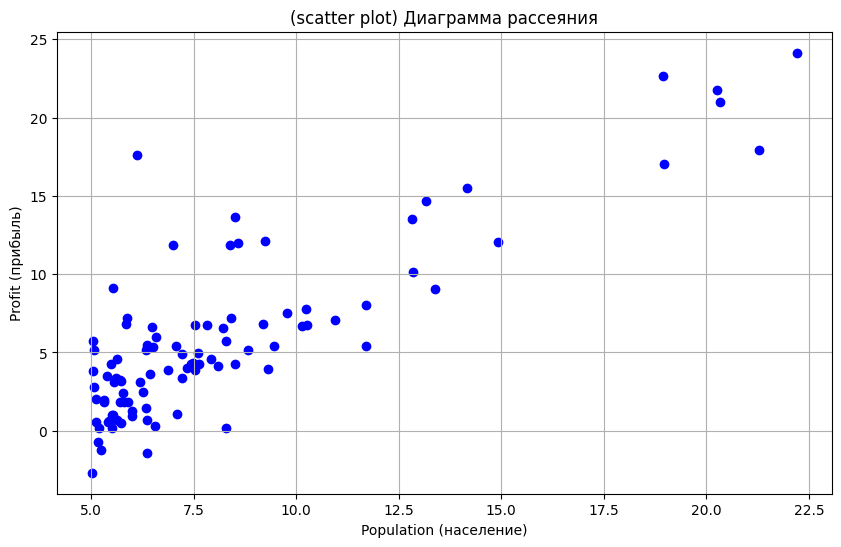

In [4]:
# Построение графика разброса данных
plt.figure(figsize=(10, 6))
plt.scatter(df1['Population'], df1['Profit'], color='blue')
plt.title('(scatter plot) Диаграмма рассеяния')
plt.xlabel('Population (население)')
plt.ylabel('Profit (прибыль)')
plt.grid(True)
plt.show()

на графике виден линейный тренд роста

Реализация функции computeCost(X, y, theta), вычисляющую значение целевой
функции J(teta).

In [5]:
X = df1['Population'].values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = (df1["Profit"])
theta = np.array([0.0, 0.0])

In [6]:
def computeCost(X, y, theta):
  m = len(y)
  pred = X.dot(theta)
  errs = pred - y
  sq_errs = errs.T.dot(errs)
  J = sq_errs / (2 * m)
  return J

# Вычисление стоимости
cost = computeCost(X, y, theta)
print("Значение целевой функции:", cost)

Значение целевой функции: 32.072733877455676


Реализация алгоритма градиентного спуска в задаче линейной регрессии

функция gradientDescent(X, y, theta, alpha, iters),

In [7]:
def gradientDescent(X, y, theta, alpha, iters):
  m = len(y)
  J_h = np.zeros(iters)
  for i in range(iters):
    pred = X.dot(theta)
    errs = pred - y
    gradient = (1 / m) * X.T.dot(errs)
    theta = theta - alpha * gradient
    J_h[i] = computeCost(X, y, theta)
  return theta, J_h

In [8]:
# Выполнение градиентного спуска
theta1, J_h = gradientDescent(X, y, theta, alpha=0.01, iters=1000)
print("Новые значения параметров:", theta1)


Новые значения параметров: [-3.24140214  1.1272942 ]


In [9]:
cost = computeCost(X, y, theta1)
print("Значение целевой функции:", cost)

Значение целевой функции: 4.515955503078914


Построение графика с добавлением прямой

In [10]:
def plot_regression_line(df, theta, alpha, iters):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Population'], df['Profit'], color='blue', label='Data Points')

    x_values = np.linspace(df['Population'].min(), df['Population'].max(), 100)
    y_values = theta[0] + theta[1] * x_values
    plt.plot(x_values, y_values, color='red', label=f'Regression Line (alpha={alpha}) (iters = {iters})')

    plt.title(f'h(x) = {theta[0]} + {theta[1]}*x')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.legend()
    plt.grid(True)
    plt.show()

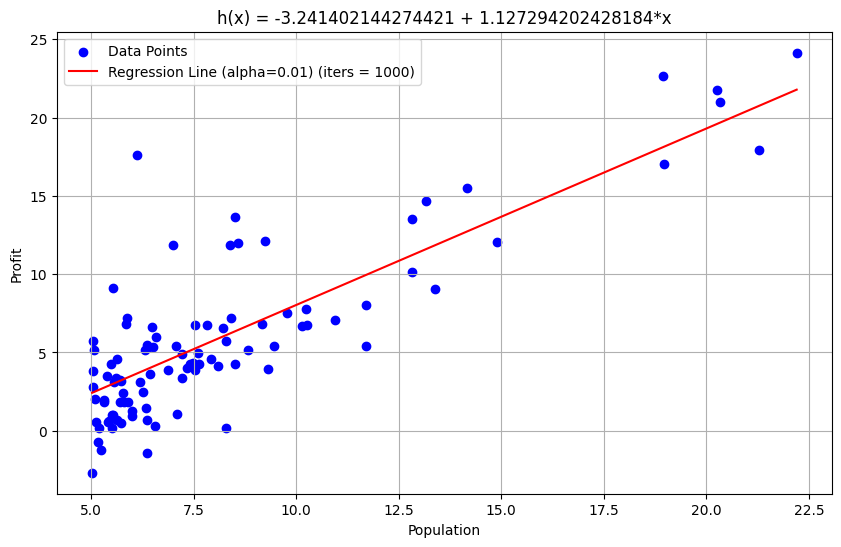

In [11]:
plot_regression_line(df1, theta1, 0.01, 1000)

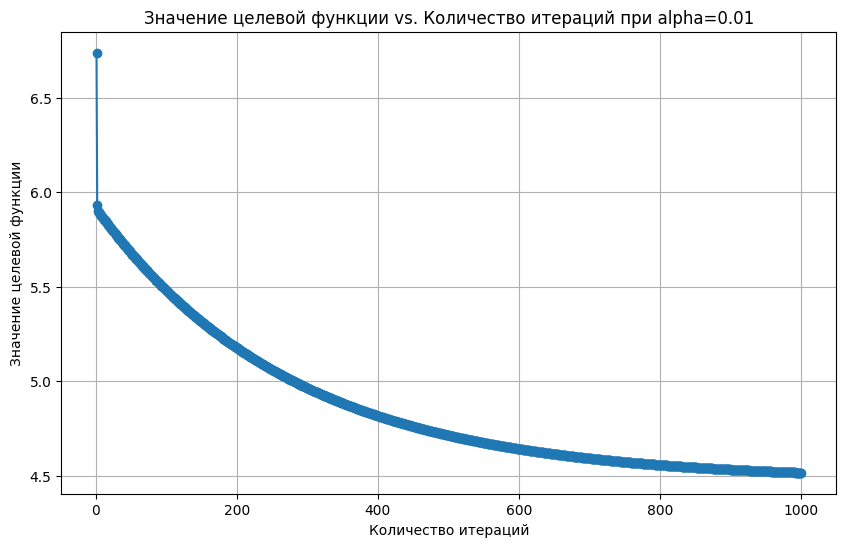

In [12]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), J_h, marker='o')
plt.title('Значение целевой функции vs. Количество итераций при alpha=0.01')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.grid(True)
plt.show()

#### Построение зависимости значений целевой фуункции от числа итераций

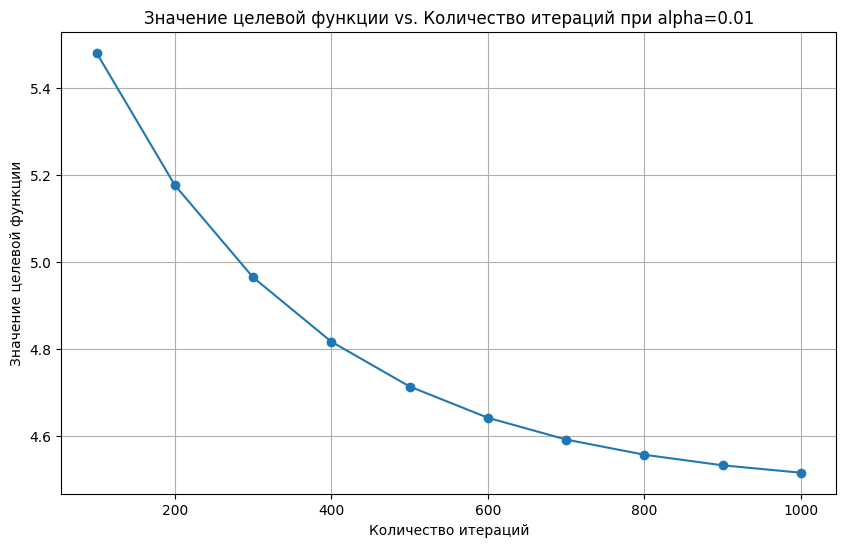

In [13]:
# Запуск градиентного спуска на разных итерациях
iterations_list = np.arange(100, 1100, 100)
results = []

for iter in iterations_list:
    theta2, J_h2 = gradientDescent(X, y, theta, alpha=0.01, iters=iter)
    results.append({'Iterations': iter, 'h(x)': J_h2[-1]})

results_df = pd.DataFrame(results)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_df['Iterations'], results_df['h(x)'], marker='o')
plt.title('Значение целевой функции vs. Количество итераций при alpha=0.01')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.grid(True)
plt.show()

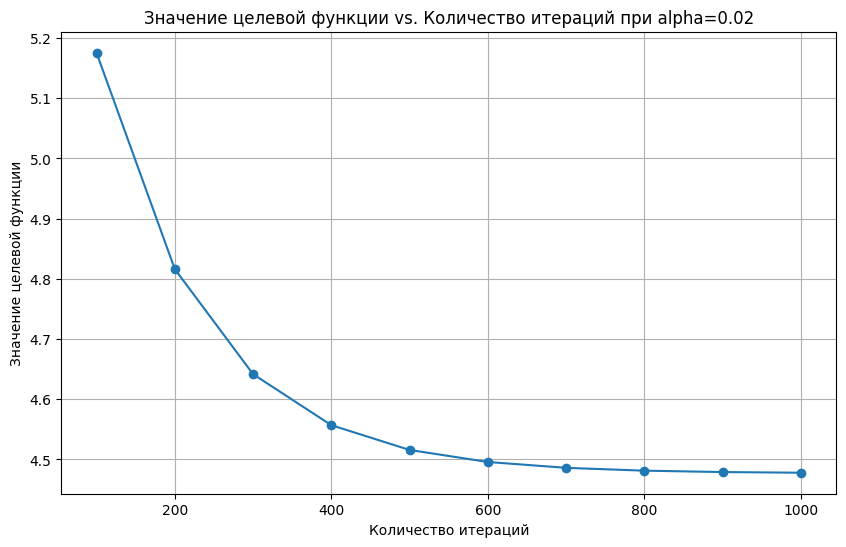

In [14]:
# Запуск градиентного спуска на разных итерациях
iterations_list = np.arange(100, 1100, 100)
results = []

for iter in iterations_list:
    theta2, J_h2 = gradientDescent(X, y, theta, alpha=0.02, iters=iter)
    results.append({'Iterations': iter, 'h(x)': J_h2[-1]})

results_df = pd.DataFrame(results)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_df['Iterations'], results_df['h(x)'], marker='o')
plt.title('Значение целевой функции vs. Количество итераций при alpha=0.02')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.grid(True)
plt.show()

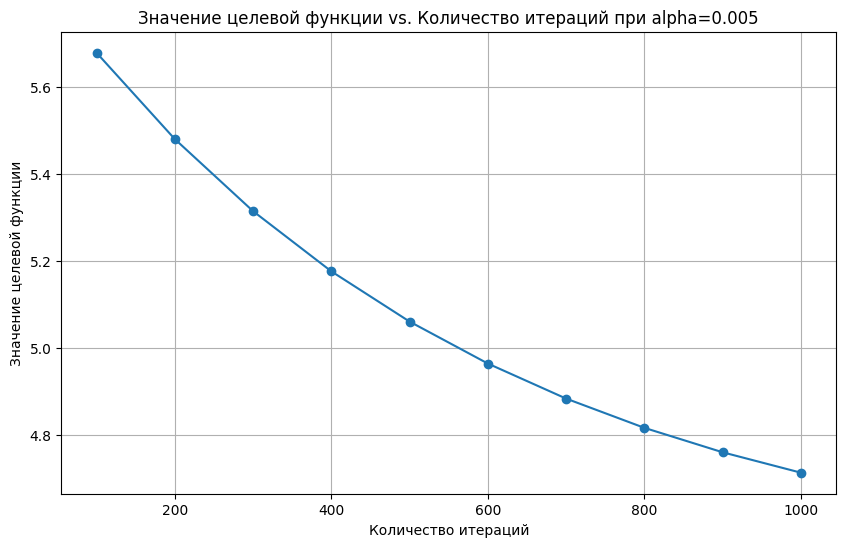

In [15]:
# Запуск градиентного спуска на разных итерациях
iterations_list = np.arange(100, 1100, 100)
results = []

for iter in iterations_list:
    theta2, J_h2 = gradientDescent(X, y, theta, alpha=0.005, iters=iter)
    results.append({'Iterations': iter, 'h(x)': J_h2[-1]})

results_df = pd.DataFrame(results)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_df['Iterations'], results_df['h(x)'], marker='o')
plt.title('Значение целевой функции vs. Количество итераций при alpha=0.005')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.grid(True)
plt.show()

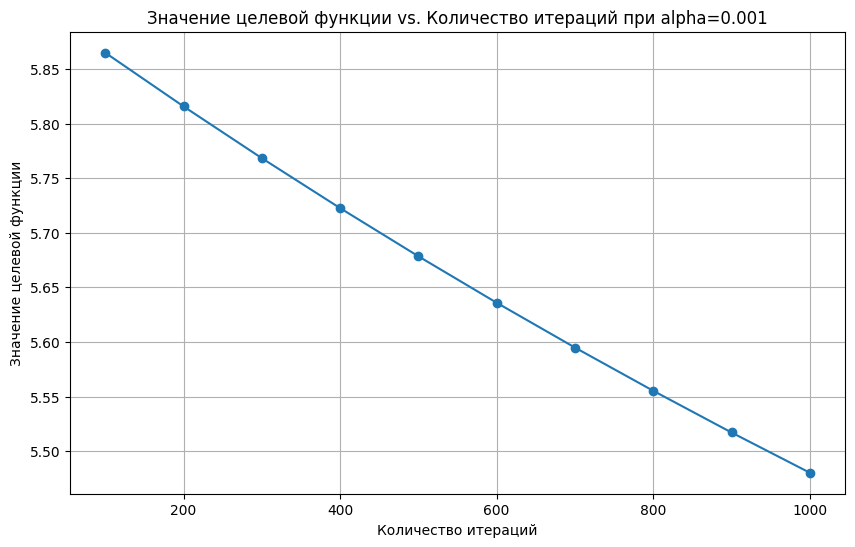

In [16]:
# Запуск градиентного спуска на разных итерациях
iterations_list = np.arange(100, 1100, 100)
results = []

for iter in iterations_list:
    theta2, J_h2 = gradientDescent(X, y, theta, alpha=0.001, iters=iter)
    results.append({'Iterations': iter, 'h(x)': J_h2[-1]})

results_df = pd.DataFrame(results)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_df['Iterations'], results_df['h(x)'], marker='o')
plt.title('Значение целевой функции vs. Количество итераций при alpha=0.001')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.grid(True)
plt.show()

#### Сравнение результатов

С уменьшением значения alpha скорость уменьшения значения целевой функции увеличилась

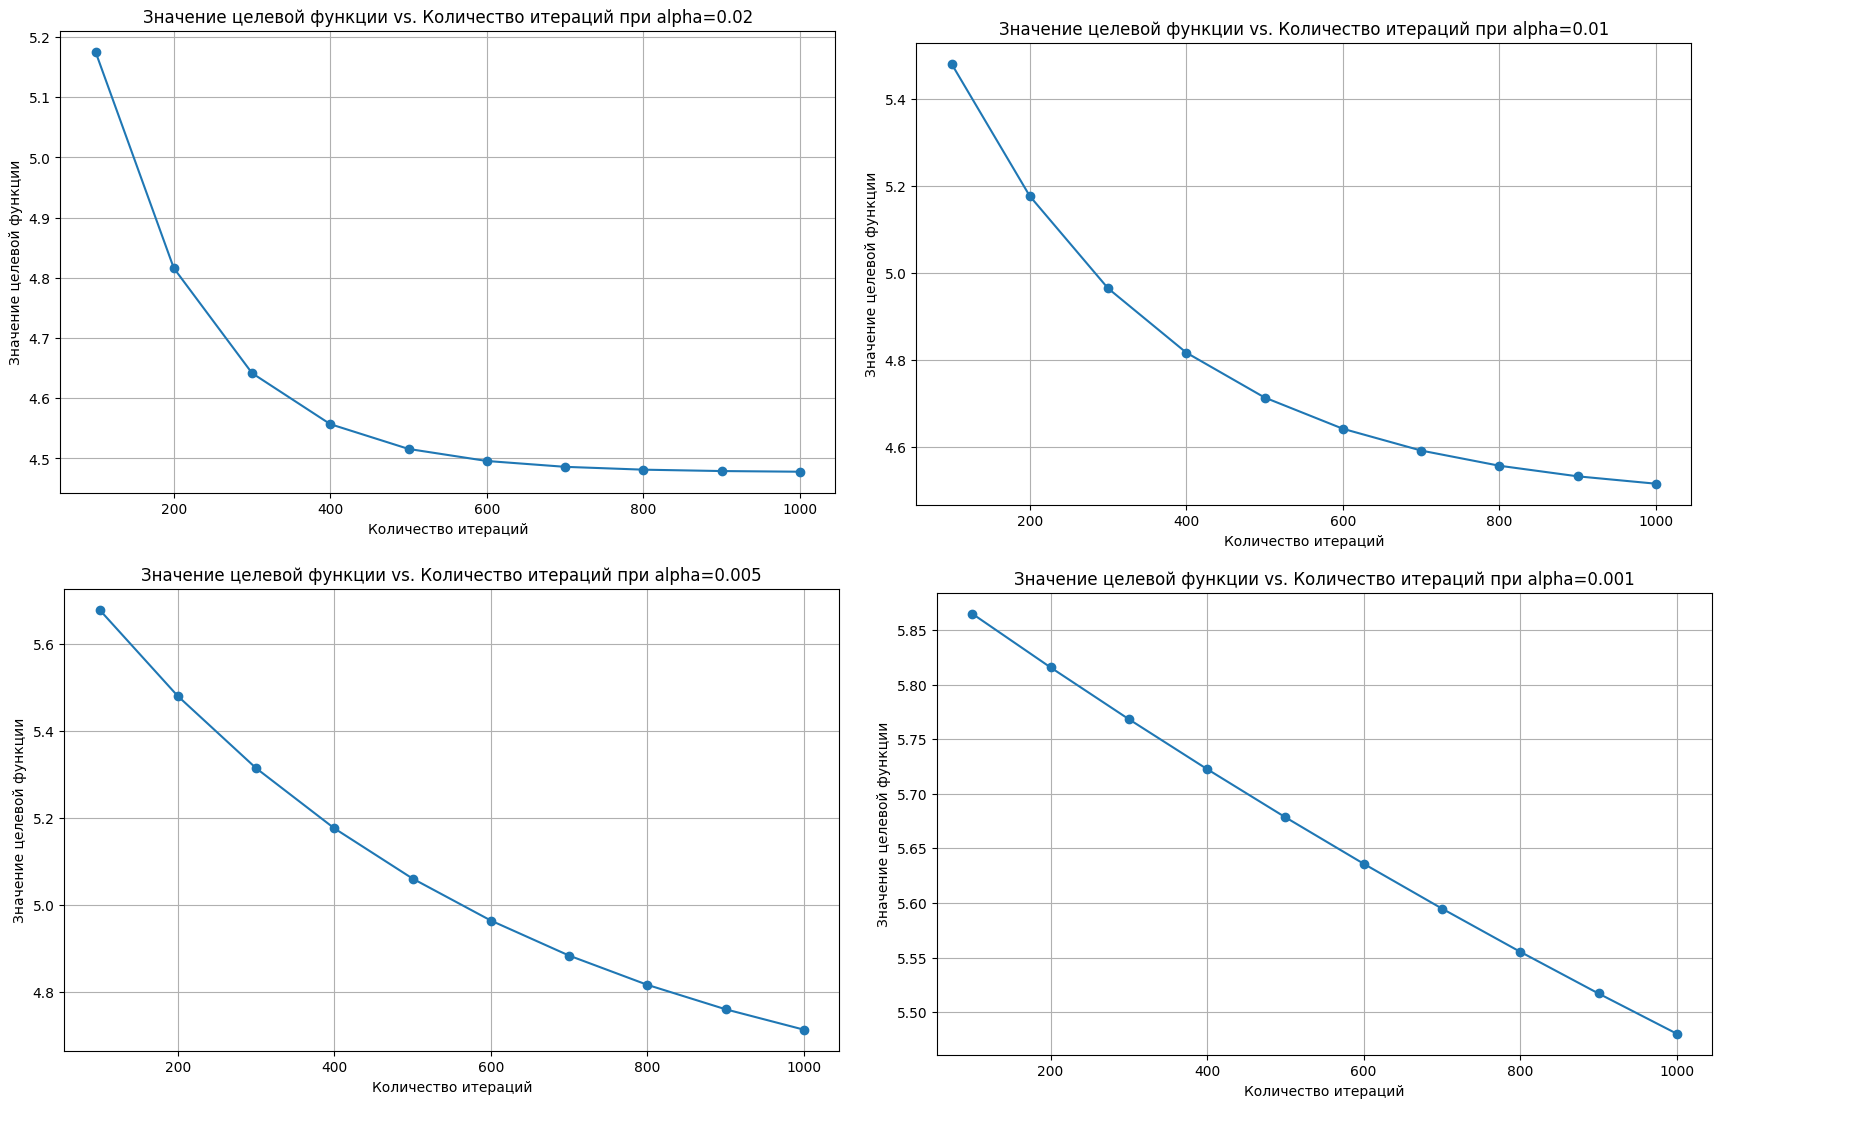

Большие значения alpha приводят к более широким шагам на каждой итерации, что ускоряет процесс уменьшения целевой функции.

При меньших значеениях alpha уменьшение функции происходит постепенно.

### Множественная линейная регрессия

In [17]:
df2 = pd.read_csv(file_path2, delimiter=',', header=None, names=['Size', 'Bedrooms', 'Price'])
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
# Нормализация данных
df2['Size'] = (df2['Size'] - df2['Size'].mean()) / df2['Size'].std()
df2['Bedrooms'] = (df2['Bedrooms'] - df2['Bedrooms'].mean()) / df2['Bedrooms'].std()
df2['Price'] = (df2['Price'] - df2['Price'].mean()) / df2['Price'].std()
df2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [19]:
X = df2[['Size', 'Bedrooms']]
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = df2['Price']
theta = np.array([0.0, 0.0, 0.0])

In [20]:
# Вычисление стоимости
cost = computeCost(X, y, theta)
print("Значение целевой функции:", cost)

Значение целевой функции: 0.4893617021276595


In [21]:
# запуск алгоритма градиентного спуска для решения задачи многомерной регрессии
# Выполнение градиентного спуска
theta, J_h = gradientDescent(X, y, theta, alpha=0.05, iters=1000)
print("Новые значения параметров:", theta1, J_h[-1])

Новые значения параметров: [-3.24140214  1.1272942 ] 0.130686480539042


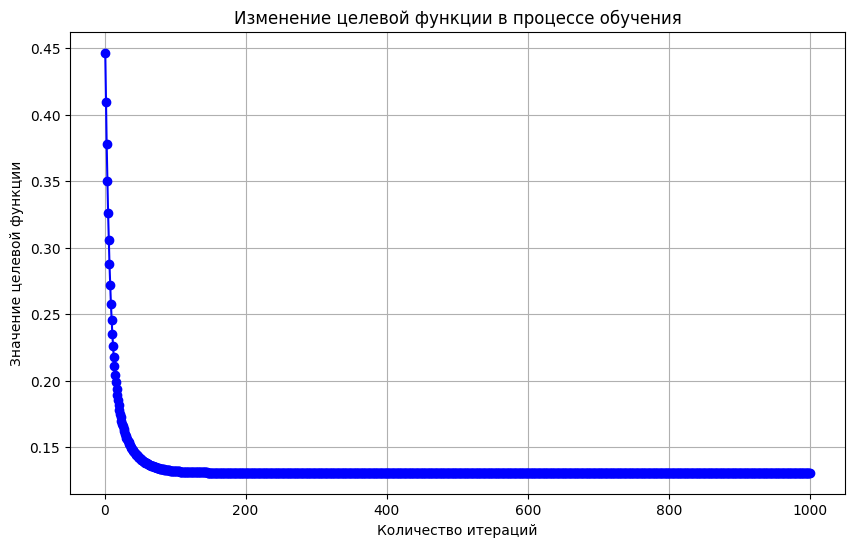

In [22]:
# Построение графика изменения целевой функции для множественной регрессии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(J_h) + 1), J_h, color='blue', marker='o')
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.title('Изменение целевой функции в процессе обучения')
plt.grid(True)
plt.show()



In [23]:
# запуск алгоритма градиентного спуска для решения задачи многомерной регрессии
# Выполнение градиентного спуска
theta, J_h = gradientDescent(X, y, theta, alpha=0.05, iters=10000)
print("Новые значения параметров:", theta1, J_h[-1])

Новые значения параметров: [-3.24140214  1.1272942 ] 0.130686480539042


На итерации 1000 было значение 0.13068648053904197, на итерации в 10000 было получено значение 0.13068648053904194. В 0 попасть невозможно.

### Возможности Python по решению задачи линейной регрессии

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Класс LinearRegression в sklearn реализует линейную регрессию с использованием нормального уравнения.

Нормальное уравнение
Нормальное уравнение — это аналитический подход к линейной регрессии с функцией наименьших квадратов стоимости. Мы можем использовать нормальное уравнение для непосредственного вычисления параметров модели, которая минимизирует сумму квадрата разницы между фактическим и прогнозируемым термином. Этот метод весьма полезен, когда набор данных небольшой. [ML | Normal Equation in Linear Regression](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)

In [25]:
df1 = pd.read_csv(file_path1, delimiter=',', header=None, names=['Population', 'Profit']) # “Population” (население) и “Profit” (прибыль)

In [26]:
X = df1['Population'].values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = (df1["Profit"])

model1 = linear_model.LinearRegression()
model1.fit(X, y)
f = model1.predict(X)

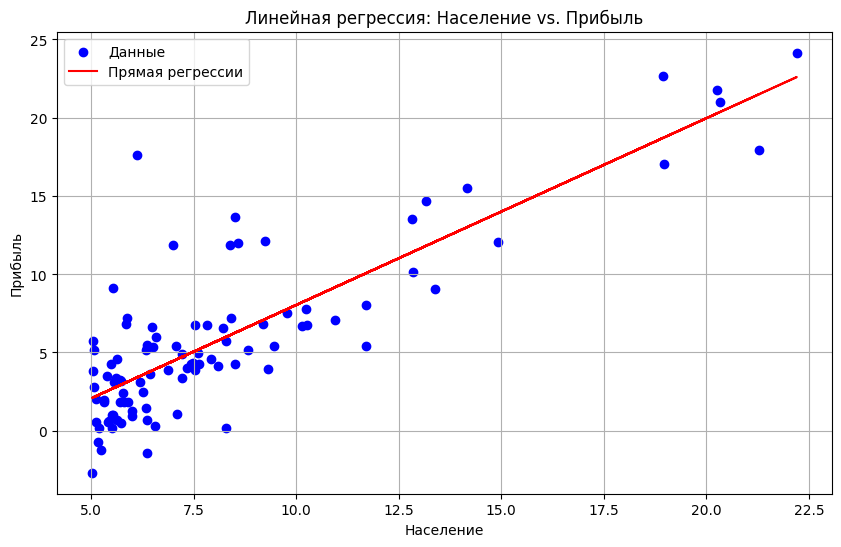

In [27]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df1['Population'], df1['Profit'], color='blue', label='Данные')
plt.plot(df1['Population'], f, color='red', label='Прямая регрессии')
plt.xlabel('Население')
plt.ylabel('Прибыль')
plt.title('Линейная регрессия: Население vs. Прибыль')
plt.grid(True)
plt.legend()
plt.show()


In [28]:
df1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [29]:
Population = 16
new_population = np.hstack((np.ones((1, 1)), np.array(Population).reshape(-1, 1)))
predicted_Profit = model1.predict(new_population )
print(f"Предсказанная прибыль: {predicted_Profit}")

Предсказанная прибыль: [15.19275743]


In [30]:
df2 = pd.read_csv(file_path2, delimiter=',', header=None, names=['Size', 'Bedrooms', 'Price'])

In [31]:
# Извлечение признаков и целевой переменной
X_size = df2[['Size']]
X_bedrooms = df2[['Bedrooms']]
y = df2['Price']

# Модель для 'Size' vs 'Price'
model_size = LinearRegression()
model_size.fit(X_size, y)
f_size = model_size.predict(X_size)

# Модель для 'Bedrooms' vs 'Price'
model_bedrooms = LinearRegression()
model_bedrooms.fit(X_bedrooms, y)
f_bedrooms = model_bedrooms.predict(X_bedrooms)

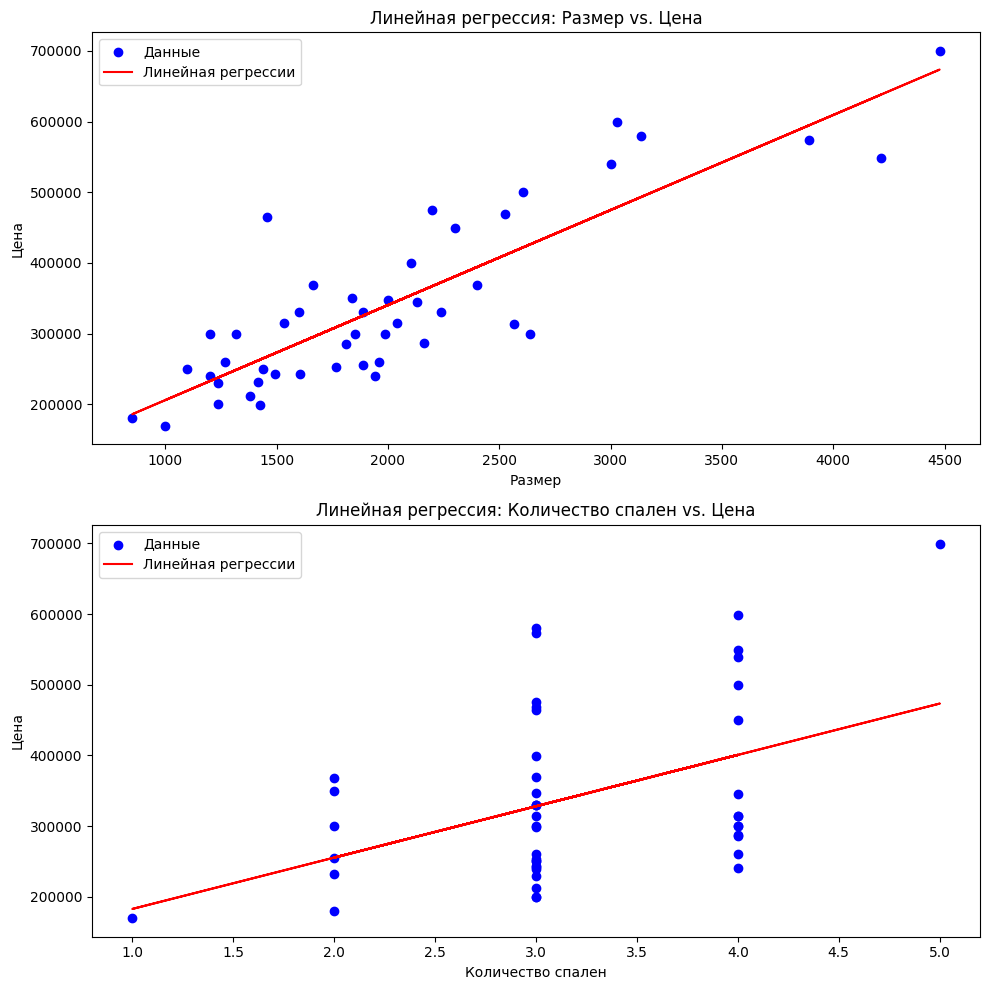

In [32]:
import matplotlib.pyplot as plt

# Построение графиков
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# График для 'Size' vs 'Price'
axs[0].scatter(df2['Size'], df2['Price'], color='blue', label='Данные')
axs[0].plot(df2['Size'], f_size, color='red', label='Линейная регрессии')
axs[0].set_xlabel('Размер')
axs[0].set_ylabel('Цена')
axs[0].set_title('Линейная регрессия: Размер vs. Цена')
axs[0].legend()

# График для 'Bedrooms' vs 'Price'
axs[1].scatter(df2['Bedrooms'], df2['Price'], color='blue', label='Данные')
axs[1].plot(df2['Bedrooms'], f_bedrooms, color='red', label='Линейная регрессии')
axs[1].set_xlabel('Количество спален')
axs[1].set_ylabel('Цена')
axs[1].set_title('Линейная регрессия: Количество спален vs. Цена')
axs[1].legend()

plt.tight_layout()
plt.show()


In [33]:
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [34]:
# Тестирование модели линейной регрессии
X = df2[['Size', 'Bedrooms']]
y = df2['Price']
model = LinearRegression()
model.fit(X, y)
size = 2500
bedrooms = 3
predicted_price = model.predict([[size, bedrooms]])
print(f"Предсказанная цена: {predicted_price[0]}")

Предсказанная цена: 411410.5372498778


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Тестирование моделей из задач 1-2

In [35]:
population = 16  # Пример значения
new_population = np.hstack((np.ones((1, 1)), np.array(population).reshape(-1, 1)))

predicted_profit = new_population.dot(theta1)
print(f"Предсказанная прибыль: {predicted_profit[0]}")


Предсказанная прибыль: 14.795305094576523


In [36]:
new_size = 2500  # Пример значения
new_bedrooms = 3  # Пример значения

# Нормализация входных данных
new_size_normalized = (new_size - df2['Size'].mean()) / df2['Size'].std()
new_bedrooms_normalized = (new_bedrooms - df2['Bedrooms'].mean()) / df2['Bedrooms'].std()

new_data = np.hstack((np.ones((1, 1)), np.array([new_size_normalized, new_bedrooms_normalized]).reshape(1, -1)))

predicted_price_normalized = new_data.dot(theta)

predicted_price = predicted_price_normalized * df2['Price'].std() + df2['Price'].mean()
print(f"Предсказанная цена: {predicted_price[0]}")


Предсказанная цена: 411410.5372498777
